# SpaceX Falcon 9 First Landing Prediction

## Assignment: Exploring and preparing Data

In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upwards of 165 million dollar each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory and Feature Engineering.

Falcon 9 first stage will land successfully.

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)

Several examples of an unsuccessful landing are shown here:

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)

Most unsuccessful landings are planned. SpaceX performs a controlled landing in the oceans.

## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`.
* Exploratory Data Analysis
* Preparing Data Feature Engineering

## Import Libraries and Define Auxiliary Functions

We will import the following libraries on the lab.

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# Numpy is a library for Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on arrays
import numpy as np
# Matplotlib is a plotting library for Python and pyplot gives us a Matlab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

## Exploratory Data Analysis

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary.

In [7]:
df = pd.read_csv("dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [8]:
df.shape

(90, 18)

In [9]:
# This loop is to print all of the columns of df's dataframe
for name in df.columns:
    print(name)

FlightNumber
Date
BoosterVersion
PayloadMass
Orbit
LaunchSite
Outcome
Flights
GridFins
Reused
Legs
LandingPad
Block
ReusedCount
Serial
Longitude
Latitude
Class


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts) and `Payload` variables would affect the launch outcome.

We can plot out the `FlightNumber` vs `PayloadMass` and overlay the outcome of the launch. We see that as the flight number increase, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

<Figure size 800x400 with 0 Axes>

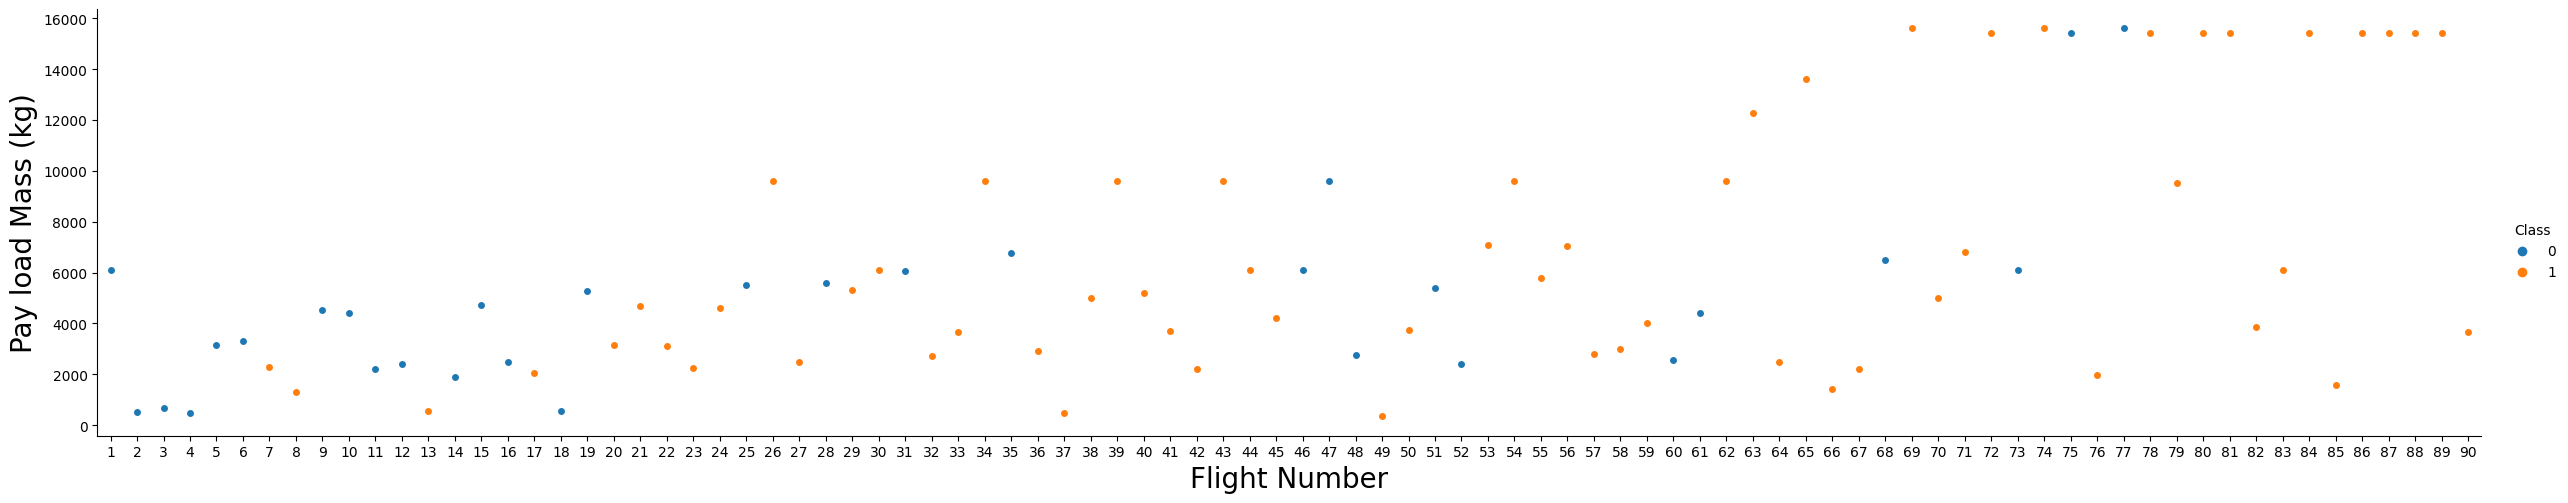

In [10]:
fig = plt.figure(figsize = (8, 4))

sns.catplot(y = "PayloadMass", x = "FlightNumber", hue = "Class", data = df, aspect = 5)
plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Pay load Mass (kg)", fontsize = 20)
plt.show();

We see that different launch sites have different success rates `CCAFS LC-40` has a success rate of 60%, while `KSC LC-39A` and `VAFB SLC 4E` has a success rate of 77%.

Next, let's drill down to each site visualize its detailed launch records.

## Task 1: Visualize the relationship between Flight Number and Launch Site

Use the function `catplot` to plot `FlightNumber` vs `LaunchSite`, set the parameter `x` to `FlightNumber`, set the `y` to `Launch Site` and set the parameter `hue` to `class`.

In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and Y
# Axis to be LaunchSite and hue to be the class value

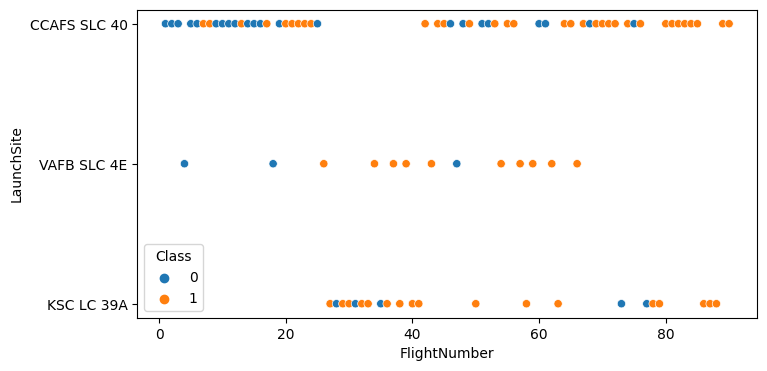

In [11]:
# Setting up the canvass
fig = plt.figure(figsize = (8, 4))

# Scatter plot using Seaborn library
sns.scatterplot(data = df,
                x = df["FlightNumber"],
                y = df["LaunchSite"],
                hue = "Class");

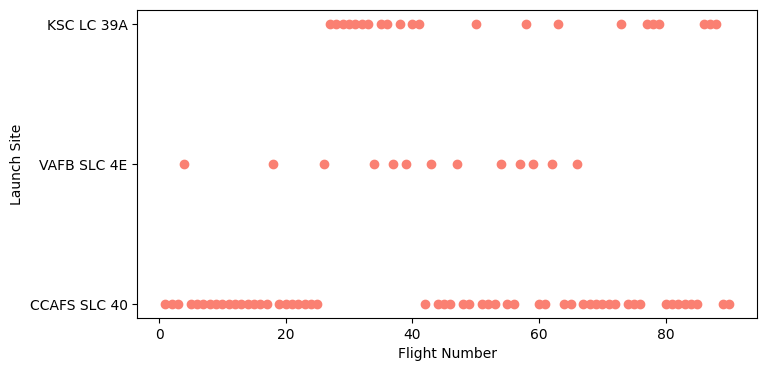

In [12]:
# Setting up the canvass
fig = plt.figure(figsize = (8, 4))

# Scatter plot using Matplotlib library
x = df['FlightNumber']
y = df['LaunchSite']

plt.scatter(x, y, color = 'Salmon')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show;

Now, try to explain the patterns you found in the Flight Number vs Launch Site scatter points plots.

## Task 2: Visualize the relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.

Plot a scatter point chart with x axis to be `PayloadMass (kg)` and y axis to be the `LaunchSite`, and hue to be the `class` value.

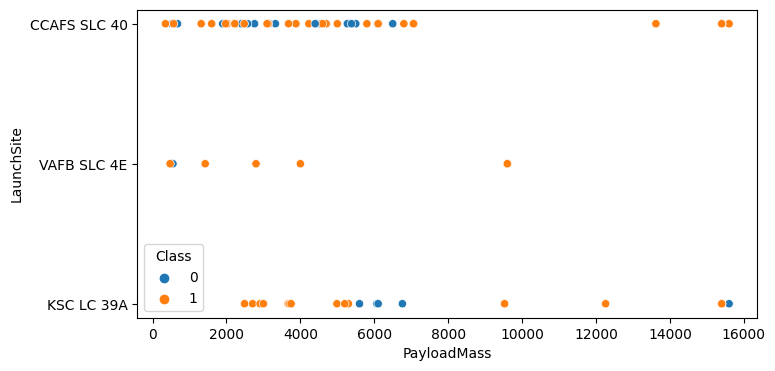

In [15]:
# Setting up the canvass
fig = plt.figure(figsize = (8, 4))

# Plot using seaborn library
sns.scatterplot(data = df,
                x = df['PayloadMass'],
                y = df['LaunchSite'],
                hue = 'Class');

Now, if you observe PayloadMass vs LaunchSite scatter point chart you will find for the VAFB-SLC launchsite that there are no rockers launched for heavy PayloadMass (greater than 10,000).

## Task 3: Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type.

Let's create a `bar chart`e for the success rate of each orbit.

In [22]:
# HINT: Use groupby method on `Orbit` column and get the mean of `class` column
gk = df.groupby(['Orbit'], as_index = False)
gk.first()

,Orbit,FlightNumber,Date,BoosterVersion,PayloadMass,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,ES-L1,13,2015-02-11,Falcon 9,570.000000,CCAFS SLC 40,True Ocean,1,True,False,True,None,1.0,0,B1013,-80.577366,28.561857,1
1,GEO,83,2020-07-20,Falcon 9,6104.959412,CCAFS SLC 40,True ASDS,2,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1058,-80.577366,28.561857,1
2,GTO,5,2013-12-03,Falcon 9,3170.000000,CCAFS SLC 40,None None,1,False,False,False,5e9e3032383ecb6bb234e7ca,1.0,0,B1004,-80.577366,28.561857,0
3,HEO,49,2018-04-18,Falcon 9,350.000000,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,4.0,1,B1045,-80.577366,28.561857,1
4,ISS,3,2013-03-01,Falcon 9,677.000000,CCAFS SLC 40,None None,1,False,False,False,5e9e3032383ecb761634e7cb,1.0,0,B0007,-80.577366,28.561857,0
5,LEO,1,2010-06-04,Falcon 9,6104.959412,CCAFS SLC 40,None None,1,False,False,False,5e9e3032383ecb267a34e7c7,1.0,0,B0003,-80.577366,28.561857,0
6,MEO,61,2018-12-23,Falcon 9,4400.000000,CCAFS SLC 40,None None,1,False,False,False,5e9e3033383ecbb9e534e7cc,5.0,0,B1054,-80.577366,28.561857,0
7,PO,4,2013-09-29,Falcon 9,500.000000,VAFB SLC 4E,False Ocean,1,False,False,False,5e9e3033383ecbb9e534e7cc,1.0,0,B1003,-120.610829,34.632093,0
8,SO,73,2020-01-19,Falcon 9,6104.959412,KSC LC 39A,None None,4,False,True,False,None,5.0,3,B1046,-80.603956,28.608058,0
9,SSO,37,2017-08-24,Falcon 9,475.000000,VAFB SLC 4E,True ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,3.0,1,B1038,-120.610829,34.632093,1


In [23]:
df_grp = gk.mean('Class')
df_grp

,Orbit,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
0,ES-L1,13.000000,570.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-80.577366,28.561857,1.000000
1,GEO,83.000000,6104.959412,2.000000,1.000000,1.000000,1.000000,5.000000,2.000000,-80.577366,28.561857,1.000000
2,GTO,35.037037,5011.994444,1.407407,0.629630,0.333333,0.629630,3.037037,0.962963,-80.586229,28.577258,0.518519
3,HEO,49.000000,350.000000,1.000000,1.000000,0.000000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
4,ISS,39.142857,3279.938095,1.238095,0.809524,0.238095,0.857143,3.142857,1.285714,-80.583697,28.572857,0.619048
5,LEO,20.000000,3882.839748,1.000000,0.571429,0.000000,0.714286,2.142857,0.428571,-80.584963,28.575058,0.714286
6,MEO,77.666667,3987.000000,1.000000,0.666667,0.000000,0.666667,5.000000,0.666667,-80.577366,28.561857,0.666667
7,PO,36.333333,7583.666667,1.333333,0.888889,0.333333,0.777778,3.222222,1.555556,-120.610829,34.632093,0.666667
8,SO,73.000000,6104.959412,4.000000,0.000000,1.000000,0.000000,5.000000,3.000000,-80.603956,28.608058,0.000000
9,SSO,60.800000,2060.000000,2.400000,1.000000,0.800000,1.000000,4.600000,3.200000,-112.604136,33.418046,1.000000


In [24]:
type(df_grp)

pandas.core.frame.DataFrame

In [25]:
df_grp.shape

(11, 12)

In [ ]:
# Convert df_grp into a DataFrame to save the summarized `Orbit` column


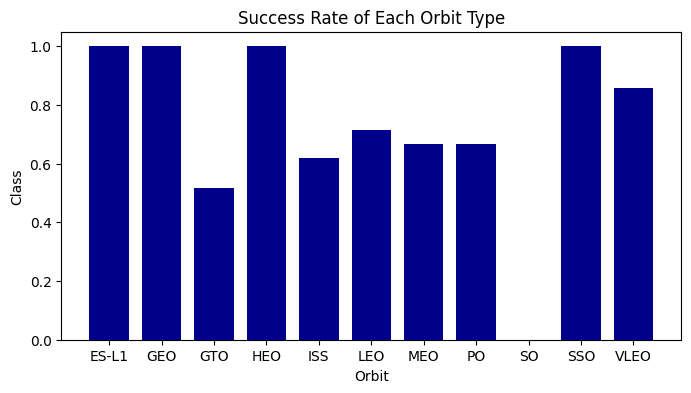

In [30]:
# Placing the values for x and y in list
x = list(df_grp['Orbit'])
y = list(df_grp['Class'])

# Setting up the canvass
fig = plt.figure(figsize = (8, 4))

# Creating a Bar plot
plt.bar(x, y, color = 'darkblue', width = 0.75)

# Adding some label descriptions
plt.xlabel('Orbit')
plt.ylabel('Class')
plt.title('Success Rate of Each Orbit Type')
plt.show();

In [31]:
df_grp['Class'].value_counts()

1.000000    4
0.666667    2
0.518519    1
0.619048    1
0.714286    1
0.000000    1
0.857143    1
Name: Class, dtype: int64

In [32]:
len(list(range(0,11)))

11

In [33]:
temp = df_grp['Orbit']
sep_df_grp = pd.DataFrame(temp)
sep_df_grp['Class'] = df_grp['Class']
sep_df_grp

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


In [45]:
sep_df_grp['Class'].value_counts()

1.000000    4
0.666667    2
0.518519    1
0.619048    1
0.714286    1
0.000000    1
0.857143    1
Name: Class, dtype: int64

In [43]:
len(sep_df_grp['Class'].value_counts())

7

Analyze the plotted bar chart and tru to find which orbits have high success rate:

In [47]:
# Say, 70% success rate is acceptable
sep_df_grp[sep_df_grp['Class'] >= 0.7]

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
3,HEO,1.000000
5,LEO,0.714286
9,SSO,1.000000
10,VLEO,0.857143


## Task 4: Visualize the relationship between FlightNumber and Orbit Type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

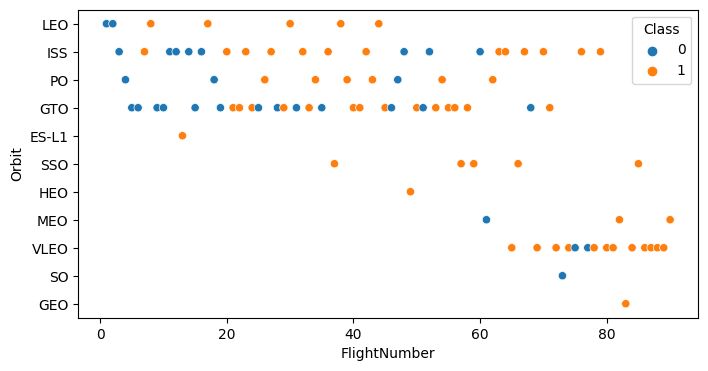

In [48]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
fig = plt.figure(figsize = (8, 4))

sns.scatterplot(data = df,
                x = df['FlightNumber'],
                y = df['Orbit'],
                hue = df['Class']);

You should see that in the LEO Orbit the Success Appears related to the number of flights. On the other hand, there seems to be no relationship between flight number when in GTO orbit. 

## Task 5: Visualize the relationship between Payload and Orbit type

Similarly, we can plot the `Payload` vs `Orbit` scatter point charts to reveal the relationship between Payload and Orbit type.

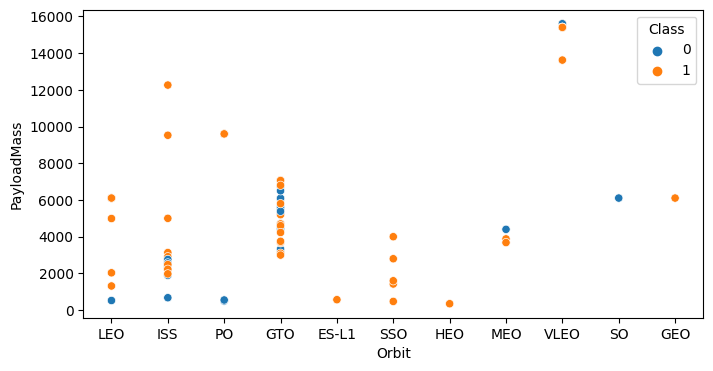

In [53]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
fig = plt.figure(figsize = (8, 4))
                     
sns.scatterplot(data = df,
                x = df['Orbit'],
                y = df['PayloadMass'],
                hue = df['Class']);

## Task 6: Visualize the Launch success Yearly trend

You can plot a line chart with x axis to be `Year` and y axis to be `average success rate`, to get the average launch success trend.

In [54]:
df['Date'][:5]

0    2010-06-04
1    2012-05-22
2    2013-03-01
3    2013-09-29
4    2013-12-03
Name: Date, dtype: object

In [55]:
# Getting the year values from df['Date'] (Short method)
year2 = []
for i in df['Date']:
    year2.append(i.split("-")[0])
print(year2)

['2010', '2012', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2015', '2015', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020']


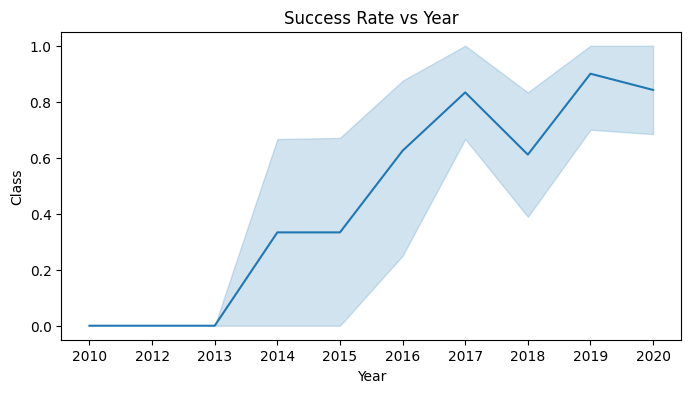

In [57]:
# Plot a line chart with x axis to be extract `year` and y axis to be the `success rate`
fig = plt.figure(figsize = (8, 4))

sns.lineplot(data = df,
             x = year2,
             y = df['Class'])
plt.xlabel('Year')
plt.ylabel('Class')
plt.title('Success Rate vs Year');

You can observe that the success rate since 2013 kept increassing till 2020.

## Features Engineering

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [58]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [59]:
features.shape

(90, 12)

## Task 7: Create dummy variables to categorical columns
Use the function `get_dummies` and features dataframe to apply OneHotEncoder to the column `Orbits`, `LaunchSite`, `LandingPad`, and `Serial`.
Assign the value to the variable `features_one_hot`, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [60]:
# HINT: Use pd.get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
features_one_hot.dtypes

FlightNumber      int64
PayloadMass     float64
Flights           int64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056      uint8
Serial_B1058      uint8
Serial_B1059      uint8
Serial_B1060      uint8
Serial_B1062      uint8
Length: 80, dtype: object

In [62]:
features_one_hot.select_dtypes(include = 'uint8')

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
features_one_hot.select_dtypes(include = 'uint8').T

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
Orbit_ES-L1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Orbit_GEO,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Orbit_GTO,0,0,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Orbit_HEO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Orbit_ISS,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Serial_B1056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Serial_B1058,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
Serial_B1059,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
Serial_B1060,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [66]:
len(features_one_hot.select_dtypes(include = 'uint8').T)

72

In [67]:
features_one_hot.shape

(90, 80)

## Task 8: Cast all Numeric columns to `float64`

Now that our `features_one_hot` dataframe only contains numbers cast the entire dataframe to variable type `float64`.

In [72]:
features_one_hot.dtypes

FlightNumber      int64
PayloadMass     float64
Flights           int64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056      uint8
Serial_B1058      uint8
Serial_B1059      uint8
Serial_B1060      uint8
Serial_B1062      uint8
Length: 80, dtype: object

In [71]:
features_one_hot.dtypes[0]

dtype('int64')

In [74]:
# HINT: Use astype function
lst1 = []
for i in features_one_hot:
    if features_one_hot.dtypes[i] == 'uint8':
        features_one_hot[i] = features_one_hot[i].astype('float64')
        lst1.append(i)
        print(i)
    else:
        pass

Orbit_GEO
Orbit_GTO
Orbit_HEO
Orbit_ISS
Orbit_LEO
Orbit_MEO
Orbit_PO
Orbit_SO
Orbit_SSO
Orbit_VLEO
LaunchSite_CCAFS SLC 40
LaunchSite_KSC LC 39A
LaunchSite_VAFB SLC 4E
LandingPad_5e9e3032383ecb267a34e7c7
LandingPad_5e9e3032383ecb554034e7c9
LandingPad_5e9e3032383ecb6bb234e7ca
LandingPad_5e9e3032383ecb761634e7cb
LandingPad_5e9e3033383ecbb9e534e7cc
Serial_B0003
Serial_B0005
Serial_B0007
Serial_B1003
Serial_B1004
Serial_B1005
Serial_B1006
Serial_B1007
Serial_B1008
Serial_B1010
Serial_B1011
Serial_B1012
Serial_B1013
Serial_B1015
Serial_B1016
Serial_B1017
Serial_B1018
Serial_B1019
Serial_B1020
Serial_B1021
Serial_B1022
Serial_B1023
Serial_B1025
Serial_B1026
Serial_B1028
Serial_B1029
Serial_B1030
Serial_B1031
Serial_B1032
Serial_B1034
Serial_B1035
Serial_B1036
Serial_B1037
Serial_B1038
Serial_B1039
Serial_B1040
Serial_B1041
Serial_B1042
Serial_B1043
Serial_B1044
Serial_B1045
Serial_B1046
Serial_B1047
Serial_B1048
Serial_B1049
Serial_B1050
Serial_B1051
Serial_B1054
Serial_B1056
Serial_B1058
Se

In [75]:
len(lst1)

71

In [77]:
# Check dtypes `uint8` if converted to `float64`
features_one_hot.dtypes

FlightNumber      int64
PayloadMass     float64
Flights           int64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

In [78]:
features_one_hot.dtypes.value_counts()

float64    74
int64       3
bool        3
dtype: int64

We can now export it to a <b>CSV</b> for the next section, but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.

<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>